[View in Colaboratory](https://colab.research.google.com/github/harekrishnamahto9872/Acadview/blob/master/Big_Mart_Sales_Analysis.ipynb)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))



Saving Big_mart.csv to Big_mart.csv
User uploaded file "Big_mart.csv" with length 869537 bytes


In [0]:
df=pd.read_csv('Big_mart.csv')

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##Cleaning Data

In [37]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##Removing NULL values from all the columns

In [0]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [0]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

##Transforming Categorical columns into numeric

In [40]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [0]:
def fun(x):
  if x=='Low Fat' or x=='LF' or x=='low fat':
    return(0)
  else:
    return(1)

In [0]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(fun)

In [43]:
df['Item_Fat_Content'].head()

0    0
1    1
2    0
3    1
4    0
Name: Item_Fat_Content, dtype: int64

In [44]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [45]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [0]:
def fun1(x):
  if x=='Medium':
    return(0)
  elif x=='High':
    return(1)
  else:
    return(2)

In [0]:
df['Outlet_Size']=df['Outlet_Size'].apply(fun1)

In [48]:
df['Outlet_Size'].head()

0    0
1    0
2    0
3    0
4    1
Name: Outlet_Size, dtype: int64

In [49]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [0]:
def fun2(x):
  if x=='Tier 1':
    return(0)
  elif x=='Tier 2':
    return(1)
  else:
    return(2)

In [0]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].apply(fun2)

In [52]:
df['Outlet_Location_Type'].head()

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int64

In [53]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [0]:
def fun3(x):
  if x=='Supermarket Type1':
    return(0)
  elif x=='Supermarket Type2':
    return(1)
  elif x=='Supermarket Type3':
    return(2)
  else:
    return(3)

In [0]:
df['Outlet_Type']=df['Outlet_Type'].apply(fun3)

In [56]:
df['Outlet_Type'].head()

0    0
1    1
2    0
3    3
4    0
Name: Outlet_Type, dtype: int64

In [58]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

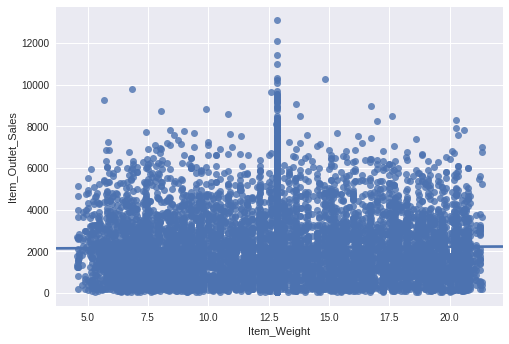

In [59]:
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

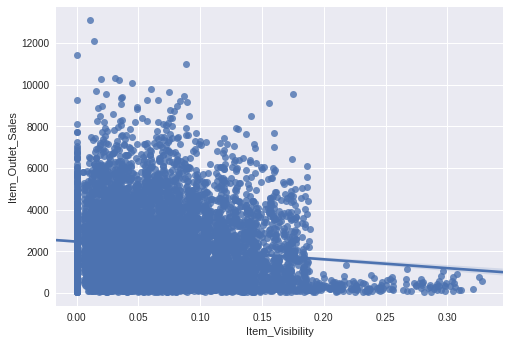

In [60]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

In [61]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.024756,-0.008301,0.003229,0.004088,0.002725,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,0.006063,0.003151,-0.003103,-0.001598,-0.001967,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.001315,-0.074834,0.049712,-0.028099,0.223308,-0.128625
Item_MRP,0.024756,0.006063,-0.001315,1.000000,0.005020,0.010810,0.000232,-0.006671,0.567574
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.005020,1.000000,-0.217519,-0.089216,-0.433070,-0.049135
Outlet_Size,0.003229,-0.003103,0.049712,0.010810,-0.217519,1.000000,-0.429200,-0.107372,-0.091442
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.000232,-0.089216,-0.429200,1.000000,0.290939,0.089367
Outlet_Type,0.002725,-0.001967,0.223308,-0.006671,-0.433070,-0.107372,0.290939,1.000000,-0.209854
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.567574,-0.049135,-0.091442,0.089367,-0.209854,1.000000


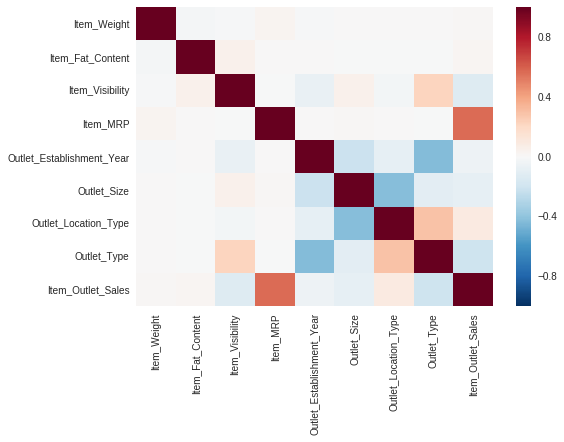

In [62]:
sns.heatmap(df.corr())

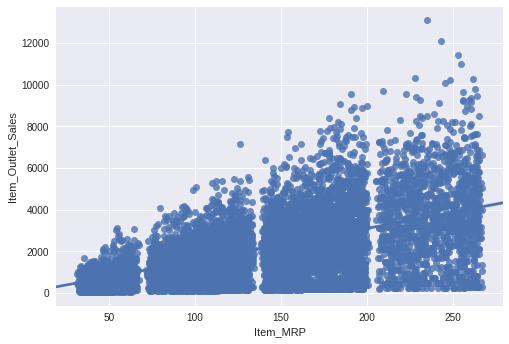

In [63]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

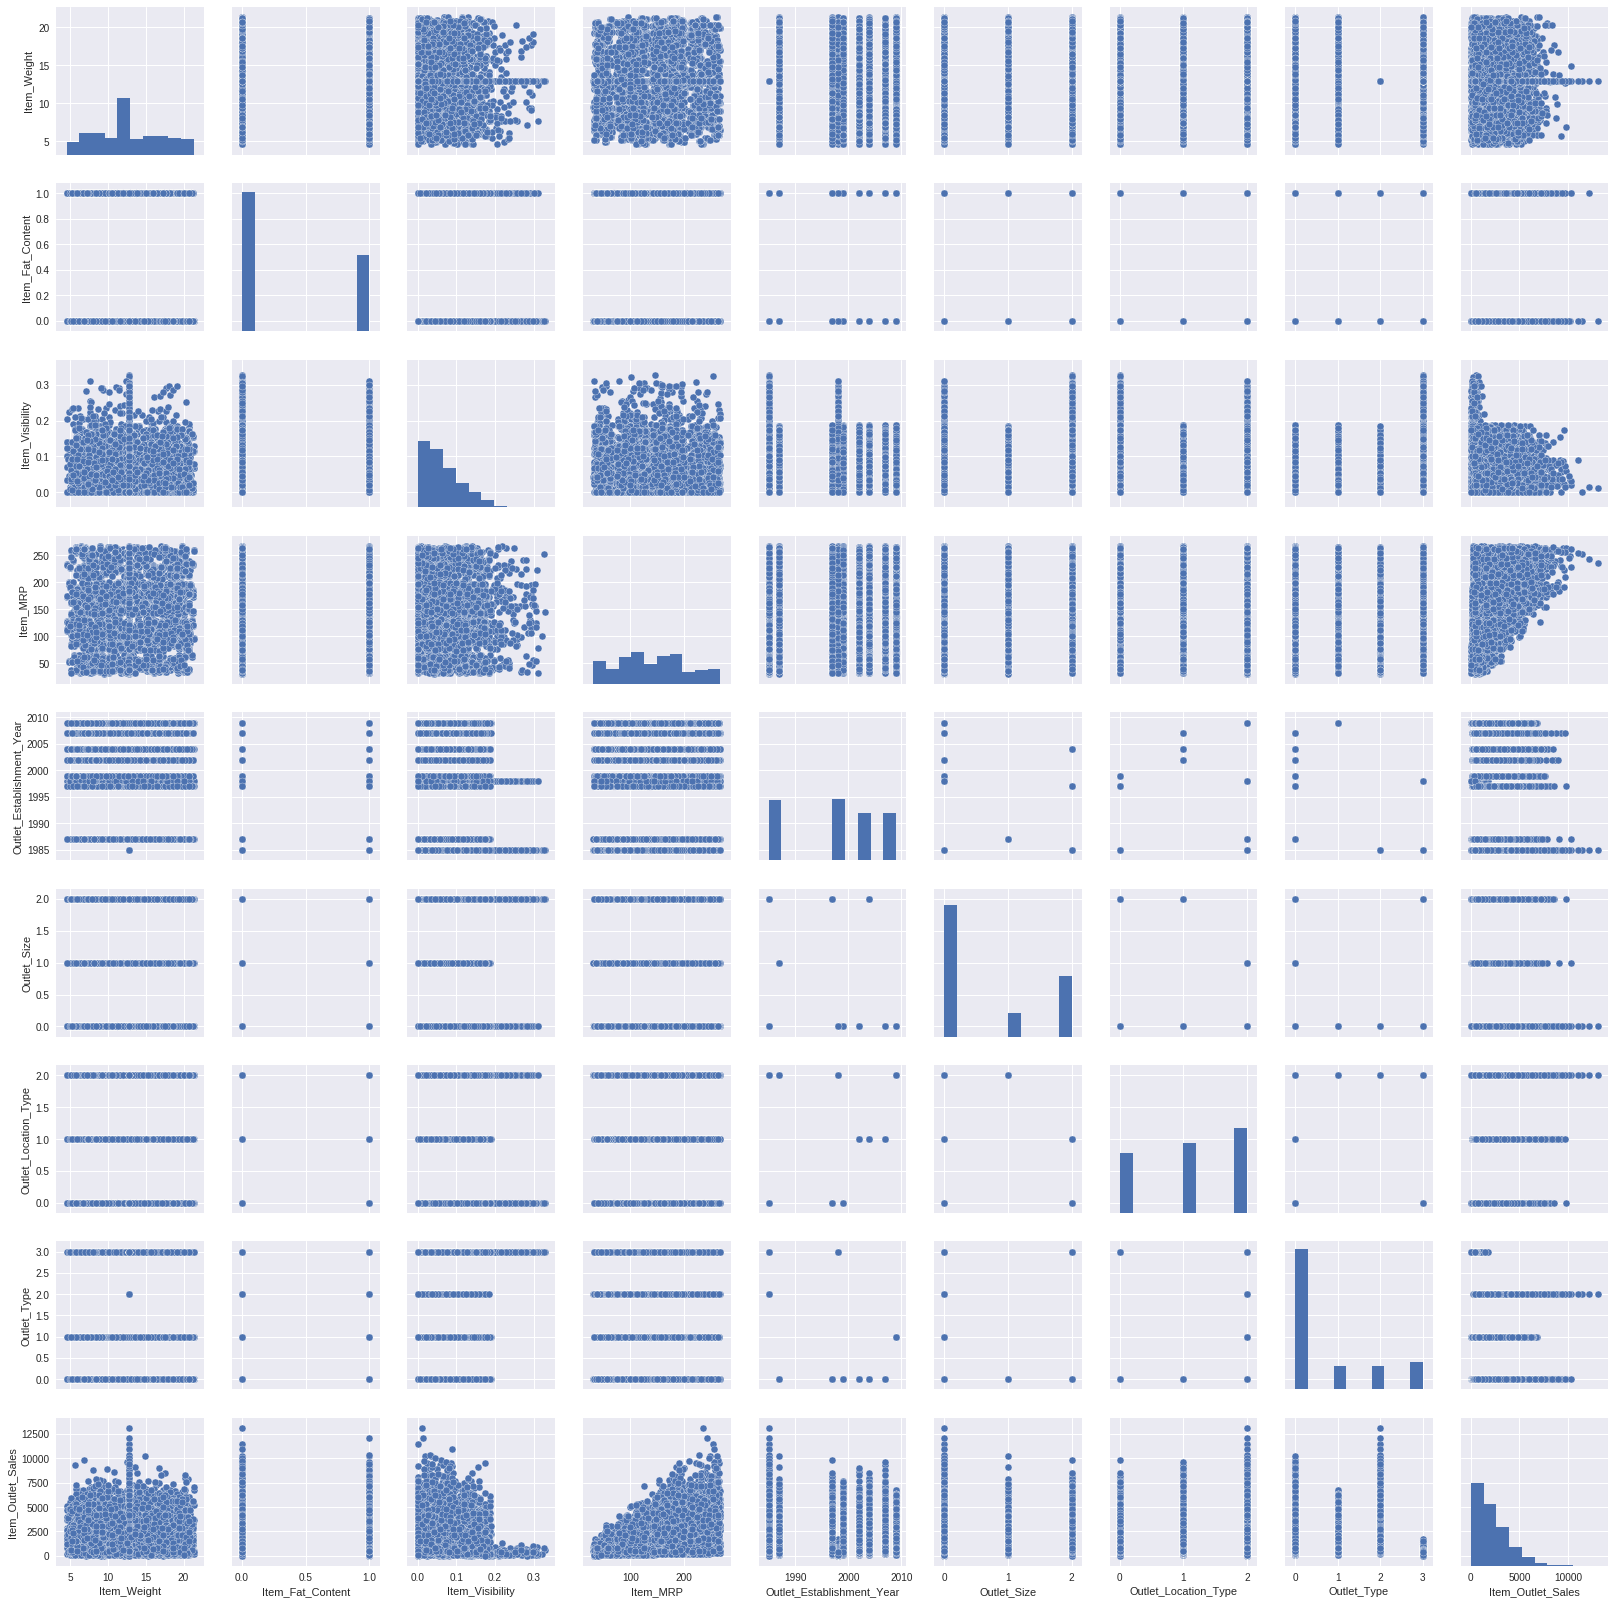

In [64]:
sns.pairplot(df)